In [2]:
# import reddit scraping package 
import praw
import pandas as pd
import re
import matplotlib.pyplot as plt
from collections import Counter
from pywaffle import Waffle

we must first authenticate ourselves before scraping by giving your `client_id`, `client_secret` and a `user_agent`.

In [3]:
# providing necessary authenticating information to use praw
reddit = praw.Reddit(client_id='clientid', client_secret='clientsecret', user_agent='useragent')

Now we can scrap data from any subreddit. Let's obtain all posts from the gunpla subreddit in the past 12 months

In [59]:
# obtain all posts from the gunpla subreddit in the past 12 months.
# credit to (https://medium.com/swlh/scraping-reddit-using-python-57e61e322486)
subreddit = reddit.subreddit('gunpla')
query = ['gunpla']

for item in query:
     gunpla_dict = {
            "title" : [],   #title of the post
            "score" : [],   # score of the post
            "id" : [],      # unique id of the post
            "url" : [],     #url of the post
            "comms_num": [],   #the number of comments on the post
            "created" : [],  #timestamp of the post
            "body" : []         # the descriptionof post
        }
        
# appending posts from the past year into the dictionary
for submission in subreddit.top(limit = None, time_filter = "year"):
    gunpla_dict["title"].append(submission.title)
    gunpla_dict["score"].append(submission.score)
    gunpla_dict["id"].append(submission.id)
    gunpla_dict["url"].append(submission.url)
    gunpla_dict["comms_num"].append(submission.num_comments)
    gunpla_dict["created"].append(submission.created)
    gunpla_dict["body"].append(submission.selftext)
    
# turning into dataframe AND csv
post_data = pd.DataFrame(gunpla_dict)
post_data.to_csv("gunpla subreddit.csv")

In [4]:
# extracting only the necessary information from the previous dataframe 
subreddit = reddit.subreddit('gunpla')
query = ['gunpla']

list_of_gunpla_titles = []

# appending posts and splitting all words in the title 
for submission in subreddit.top(limit = None, time_filter = "year"):
    list_of_gunpla_titles.append(re.split(r'\s', submission.title.lower()))
    
# list of key words (name of the model kit)
gunpla = ["rx-78", "mk-ii", "zeta", "zz", "guncannon", "gyan", "zaku", "quebely", 
          "hyaku-shiki", "z'gok", "guntank", "gogg", "gouf", "dias", "qubeley", 
          "zack", "gp01", "bawoo", "gelgoog", "dom", "gm", "zeong", "zekueins", 
          "gp03", "gp01fb", "dendrobium", "ex-s", "super", "the-o", "hy-gogg", 
          "nt-1", "gaplant", "psycho", "marasai", "asshimar", "hazel", "gabthley", 
          "athene", "methuss", "gaza-c", "zudah", "gp02", "ground", "acguy", "zock", 
          "jagd", "re-gz", "nu", "sazabi", "kampfer", "geara", "hi-nu", "jack", "jegan", 
          "kshatriya", "unicorn", "rezel", "loto", "x", "god", "ball", "delta", "sinanju", 
          "nobell", "dreissen", "shining", "jesta", "zee", "juaggu", "nemo", "anksha", "jabber", 
          "hambrabi", "rozen", "ez-8", "messala", "gerbera", "doven", "zogok", "wing", "v", "f91", 
          "v2", "bullet", "aile", "rouge", "turn", "zssa", "schuzrum-galluss", "airmaster", "freedom", 
          "impulse", "barzam", "tristan", "efreet", "leo", "moon", "dijeh", "r-jarija", "gustav", "narrative", 
          "maganac", "destiny", "suppressor", "sandrock", "penelope", "justice", "infinite", "windam", "messer", 
          "baund", "heavyarms", "dagger", "xi", "deathscythe", "nightingale", "shenlong", "waff", "bugu", 
          "fsd", "atlas", "lfrith", "beguir-beu", "g-self", "grimoire", "montero", "g-arcane", "jahannam", 
          "bullock", "gaeon", "mack", "g-lucifer", "catsith", "dahack", "gastima", "kabakali",  "g40", 
          "calamity", "raider", "aile", "freedom", "impulse", "aegis", "buster", "astray", "duel", "justice", 
          "infinite", "blitz", "providence", "chaos", "destiny", "legend", "saviour", "ginn", "forbidden", 
          "rouge", "dreadnaught", "murasame", "bucue", "stargazer", "exia", "dynames", "kyrios", "virtue", 
          "astraea", "flag", "tieren", "astraea", "avalanche", "oo", "oraiser", "cherudim", "arios", "seravee",
          "union", "nadreeh", "gn-x", "ahead", "gadessa", "gn", "seraphim", "sergei", "garazzo", "arche", 
          "susanowo", "gaddess", "reborns", "masurao", "quan[t]", "zabanya", "harute", "raphael", "age", 
          "gafran", "ganoace", "zedas", "baqto", "g-exes", "dorado", "zedas", "adele", "g-bouncer", 
          "zeydra", "genoace", "shaldoll", "farsia", "danazine", "ghirarga", "g-exes", "clanche", 
          "legilis", "clanche", "shaldoll", "g-xiphos", "helios", "livelance", "blazing", "barbataurus", 
          "earthree", "veetwo", "knight", "nu-zeon", "core", "valkylander", "seltsam", "eldora", "jupitive", 
          "tertium", "g-else", "gp-rase-two-ten", "alus", "uraven", "saturnix", "magnum", "wodom", "re:rising", 
          "momocapool", "ogre", "barbatos", "graze", "schwalbe", "rebake", "gusion", "kimaris", "grimgerde",
          "vidar", "bael", "hyakuri", "hyakuren", "rodi", "ryusei-go", "astaroth", "hugo", "reginlaze",
          "shiden", "geirail", "flauros", "hashmal", "hekija", "helmwige", "rouei", "vual", "dantalion",
          "marchosias", "hajiroboshi", "gremory", "asmoday", "sigrun", "granddaddy"]

# remove possible duplicates in the above list
gunpla = list(set(gunpla))

# iterate through each keyword in the reddit submission titles to count their number of occurrences
gunpla_frequency = {}


for word in gunpla:
    for i in range(len(list_of_gunpla_titles)):
        if (word in list_of_gunpla_titles[i]) and (word not in gunpla_frequency):
            gunpla_frequency[word] = 1
        elif (word in list_of_gunpla_titles[i]) and (word in gunpla_frequency):
            gunpla_frequency[word] += 1
        if (word not in list_of_gunpla_titles[i]) and (word not in gunpla_frequency):
            gunpla_frequency[word] = 0

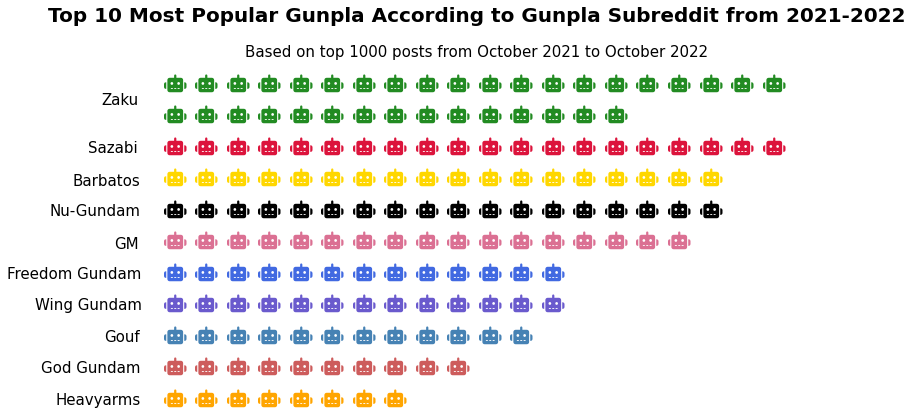

In [62]:

# taking the top 10 gunpla
gunpla_freq_top = dict(Counter(gunpla_frequency).most_common(10))

# plot of pictogram
fig = plt.figure(FigureClass=Waffle,
                 figsize=(9,7),
                 values=gunpla_freq_top,
                 columns=20,
                 vertical=True,
                 starting_location='NW',
                 block_arranging_style='new-line',
                 colors = ['forestgreen', 'crimson', 'gold', 'black', 'palevioletred', 'royalblue',
                           'slateblue', 'steelblue', 'indianred', 'orange'],
                 icons= 'robot',
                 font_size=18)
plt.title('Based on top 1000 posts from October 2021 to October 2022', fontsize=15)
plt.suptitle('Top 10 Most Popular Gunpla According to Gunpla Subreddit from 2021-2022', fontsize=20, 
          fontweight = "bold", y = 0.92)
fig.text(x=-0.08, y=0.725, s='Zaku', fontsize=15)
fig.text(x=-0.1, y=0.63,s='Sazabi', fontsize=15)
fig.text(x=-0.125, y=0.565, s='Barbatos', fontsize=15)
fig.text(x=-0.16, y=0.505, s='Nu-Gundam', fontsize=15)
fig.text(x=-0.06, y=0.44, s='GM', fontsize=15)
fig.text(x=-0.225, y=0.38, s='Freedom Gundam', fontsize=15)
fig.text(x=-0.1825, y=0.32, s='Wing Gundam', fontsize=15)
fig.text(x=-0.075, y=0.255, s='Gouf', fontsize=15)
fig.text(x=-0.1725, y= 0.195, s='God Gundam', fontsize=15)
fig.text(x=-0.15, y=0.13, s='Heavyarms', fontsize=15)
plt.legend([]).remove()
plt.show()

# save as png
fig.savefig('gunpla_viz.jpg', bbox_inches = 'tight')

Credits: 
1) (https://medium.com/swlh/scraping-reddit-using-python-57e61e322486) 

2) (https://towardsdatascience.com/scraping-reddit-data-1c0af3040768) 

3) (https://towardsdatascience.com/2-efficient-ways-of-creating-fancy-pictogram-charts-in-python-8b77d361d500)